<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación diferencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador armónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


## Solución Actividad 01 por el método de Euler

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Para resolver la EDO por el método de Euler realizamos los siguientes pasos:

1. Discretización del dominio: se divide el intervalo temporal $[a, b]$ en $n$ subintervalos de longitud h, donde $h = (b - a)/ n $

2. Formulación iterativa: se inicia la iteración definiendo un punto inicial o condición inicial, es decir, se supone una valor de y en un valor de t, $y(t_0) = y_0$.
Luego se realiza la aproximación de los puntos $x_1, x_2, ..., x_n$ por medio de la programación de la siguiente recurrencia:
  $y_{i+1} = y_i + h ⋅ f(x_i, y_i)$ donde $f(x_i, y_i)$ es la derivada de y respecto a x

3. Iteración: se repite el punto 2 hasta llegar al valor final de la función y.

In [ ]:
#debemos definir las condiciones iniciales del sistema (nuestro PVI), la constante lambda numérica, el delta t

#definimos el intervalo y subintervalos
t_0 = 0
t_f = 10
intervalos = 1000000  #número de intervalos
linspace = np.linspace(t_0, t_f, intervalos)

#definimos un valor inicial para y(t_0) = y_0 y la función lambda

y_0 = 100
constante_lambda = 1
delta_t = (t_f - t_0)/ intervalos

In [ ]:
#definimos la solución teórica para graficarla

f = lambda x: y_0 * np.exp(-constante_lambda*x)

In [ ]:
#necesitamos encontrar los valores aproximados de t_1, t_2, ...t_n entonces definimos la derivada de la función luego hacemos un aproximado de la función

def derivada(t, y, constante):
  f = -constante*y
  return f

In [ ]:
#ahora podemos definir la función de recurrencia para y

def funcion(y_0, delta_t, intervalo):
  y = np.zeros(len(intervalo))
  for m,i in enumerate(intervalo):
    y_i = y_0 + (delta_t * derivada(i, y_0,constante_lambda))
    y_0 = y_i
    y[m] = y_i
  return y

a = funcion(y_0, delta_t, linspace)

## Solucion Actividad 01 por el método de Runge-Kutta

In [ ]:
#como ya definimos las condiciones iniciales solo las usaremos

def funcion2(y_0, delta_t, intervalo):
  y = np.zeros(len(intervalo))
  for m,i in enumerate(intervalo):
    k_1 = derivada(i, y_0, constante_lambda)
    k_2 = derivada(i + delta_t/2, y_0 + (k_1*delta_t)/2, constante_lambda)
    k_3 = derivada(i + delta_t/2, y_0 + (k_2*delta_t)/2, constante_lambda)
    k_4 = derivada(i + delta_t, y_0 + k_3*delta_t, constante_lambda)
    y_i = y_0 + (delta_t*(k_1 + 2*k_2 + 2*k_3 + k_4))/6
    y_0 = y_i
    y[m] = y_i
  return y

b = funcion2(y_0, delta_t, linspace)

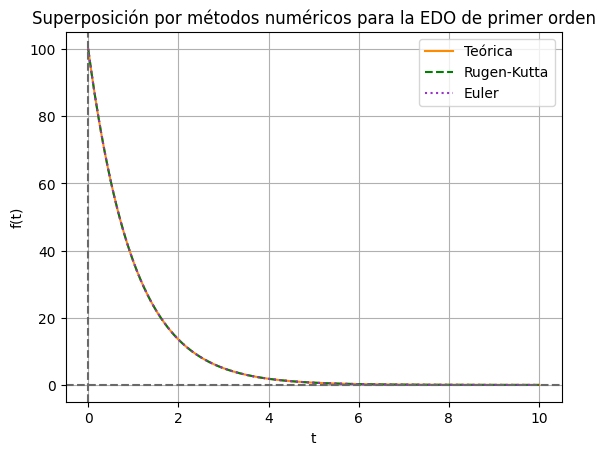

In [ ]:
plt.plot(linspace, f(linspace), color = "darkorange",  label = "Teórica")
plt.plot(linspace, b, color = "green", linestyle = "--", label = "Rugen-Kutta")
plt.plot(linspace, a, color = "darkorchid", linestyle = ":",  label = "Euler")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.title("Superposición por métodos numéricos para la EDO de primer orden")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

## Solución Actividad 02 por el método de Euler

In [ ]:
#empezamos definiendo las constantes

m = 1
b = 1/2
k = 100

#condicion inicial de la velocidad, para y se utilizará la misma condición inicial de la actividad 01
v_0 = 0.1
def parametros(masa, constante_resorte, constante_friccion):
  omega_cuadrado = constante_resorte/masa
  gamma = constante_friccion/masa
  return omega_cuadrado, gamma

parametros = parametros(m, k, b)
condiciones_iniciales = np.array([v_0, y_0])

In [ ]:
#se definen las 2 funciones, para v y para y
def funcion_v(t, v):
  dydt = v
  return dydt

In [ ]:
def funcion_y(t, v, y, parametros):
  dvdt = -(parametros[1]*v) - ((parametros[0])*y)
  return dvdt

In [ ]:
linspace2 = np.linspace(t_0, t_f, intervalos)
def edo_orden2(condiones_inciales, delta_t, intervalo):
  y_f = np.zeros(len(intervalo))
  v_f = np.zeros(len(intervalo))
  v_0, y_0 = condiciones_iniciales
  for m, i in enumerate(intervalo):
    y_i = y_0 + (delta_t*funcion_v(i, v_0))
    v_i = v_0 + (delta_t*funcion_y(i, v_0, y_0, parametros))
    y_f[m] = y_i
    v_f[m] = v_i
    y_0 = y_i
    v_0 = v_i

  return y_f, v_f

c = edo_orden2(condiciones_iniciales, delta_t, linspace2)

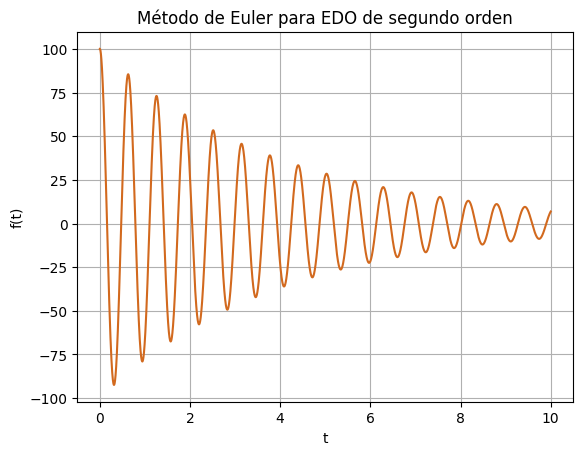

In [ ]:
plt.plot(linspace2, c[0], color = "chocolate")
plt.title("Método de Euler para EDO de segundo orden")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

## Solución Actividad 02 por método Runge-Kutta

In [ ]:
def edo_orden2rk(y_0, v_0, delta_t, intervalo):
  y = np.zeros(len(intervalo))
  v = np.zeros(len(intervalo))
  for m,i in enumerate(intervalo):
    k_1 = funcion_v(i, v_0)
    k_2 = funcion_v(i + delta_t/2, v_0 + (k_1*delta_t)/2)
    k_3 = funcion_v(i + delta_t/2, y_0 + (k_2*delta_t)/2)
    k_4 = funcion_v(i + delta_t, v_0 + k_3*delta_t)
    y_i = y_0 + (delta_t*(k_1 + 2*k_2 + 2*k_3 + k_4))/6
    y_0 = y_i
    y[m] = y_i
    k_5 = funcion_y(i, v_0, y_0, parametros)
    k_6 = funcion_y(i + delta_t/2, v_0 + (k_5*delta_t)/2, y_0 + (k_5*delta_t)/2 , parametros)
    k_7 = funcion_y(i + delta_t/2, v_0 + (k_6*delta_t)/2, y_0 + (k_6*delta_t)/2 , parametros)
    k_8 = funcion_y(i + delta_t, v_0 + k_7*delta_t, y_0 + (k_7*delta_t)/2 , parametros)
    v_i = v_0 + (delta_t*(k_5 + 2*k_6 + 2*k_7 + k_8))/6
    v_0 = v_i
    v[m] = v_i

  return y, v

b = edo_orden2rk(y_0, v_0, delta_t, linspace2)

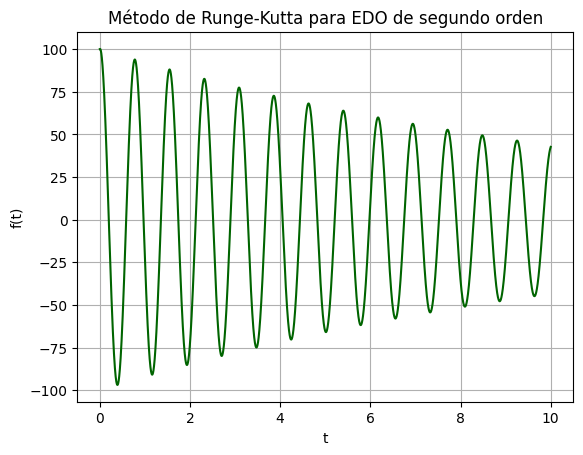

In [ ]:
plt.plot(linspace2, b[0], color = "darkgreen")
plt.title("Método de Runge-Kutta para EDO de segundo orden")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()